# Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use the same dataset of the SVM notebook: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from timeit import default_timer as timer #for question

In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place your ID ("numero di matricola") that will be used as seed for random generator. You can try to change the seed to see the impact of the randomization.

In [3]:
ID = 1206748
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
# rescale the data
X = X / 255.0

Now split into training and test. Make sure that each label is present at least 10 times
in training frequencies.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [65 53 56 35 57 41 47 51 46 49]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


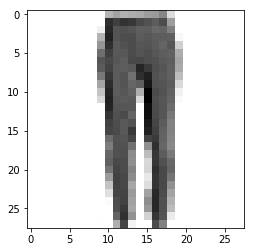

LABEL: 1
INPUT:


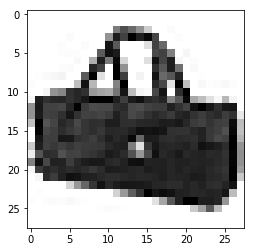

LABEL: 8
INPUT:


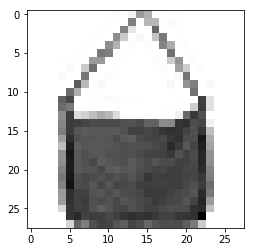

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

## TO DO 1

Now use a Feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=300, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. Evaluate the architectures you chose using the GridSearchCV with cv=5.


In [8]:
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (10,10,10,)]}

mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

crossval_NN = GridSearchCV(mlp, parameters, cv = 5)
crossval_NN.fit(X_train,y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(crossval_NN.best_params_)

print("Score with best parameters:")
print(crossval_NN.best_score_)

print("\nAll scores on the grid:")
print(crossval_NN.cv_results_['mean_test_score'])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50,)}
Score with best parameters:
0.578

All scores on the grid:
[0.404 0.578 0.208 0.47  0.244]


### QUESTION 1

What do you observe for different architectures and their scores? How the number of layers and their sizes affect the performances?

With more layers we don't have better results. We notice that convolutional neural network give us better results

### TO DO 2

Now get training and test error for a NN with best parameters from above. Use verbose=True
in input so to see how loss changes in iterations

In [9]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1, verbose=True, hidden_layer_sizes=(50,))

mlp.fit(X_train,y_train)
training_error = 1. - mlp.score(X_train,y_train) 
test_error = 1. - mlp.score(X_test,y_test) 

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

Iteration 1, loss = 2.29660726
Iteration 2, loss = 1.67962006
Iteration 3, loss = 1.24920843
Iteration 4, loss = 1.04752577
Iteration 5, loss = 1.03809551
Iteration 6, loss = 0.81516724
Iteration 7, loss = 0.67945882
Iteration 8, loss = 0.59570265
Iteration 9, loss = 0.56608063
Iteration 10, loss = 0.53266438
Iteration 11, loss = 0.53465961
Iteration 12, loss = 0.42364524
Iteration 13, loss = 0.41007436
Iteration 14, loss = 0.37598820
Iteration 15, loss = 0.32930688
Iteration 16, loss = 0.34966860
Iteration 17, loss = 0.30694340
Iteration 18, loss = 0.28133446
Iteration 19, loss = 0.29519286
Iteration 20, loss = 0.30512056
Iteration 21, loss = 0.23759211
Iteration 22, loss = 0.22394595
Iteration 23, loss = 0.24815168
Iteration 24, loss = 0.17170710
Iteration 25, loss = 0.20659824
Iteration 26, loss = 0.29998614
Iteration 27, loss = 0.18762075
Iteration 28, loss = 0.18759153
Iteration 29, loss = 0.13888821
Iteration 30, loss = 0.11476667
Iteration 31, loss = 0.13493760
Iteration 32, los

## More data 
Now let's do the same but using 10000 (or less if it takes too long on your machine) data points for training. Use the same NN architectures as before, but you can try more if you want!

In [10]:
X = X[permutation]
y = y[permutation]

m_training = 10000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

print("Labels and frequencies in training dataset: ")
np.unique(y_train, return_counts=True)

Labels and frequencies in training dataset: 


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 998,  977, 1040,  999,  951, 1052, 1005,  964,  998, 1016]))

## TO DO 3

Now train the NNs with the added data points. Feel free to try more different architectures than before if you want, or less if it takes too much time. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [11]:
#for NN we try the same architectures as before
parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,), (10,10,10,)]}

mlp_large = MLPClassifier(max_iter=300, alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=ID,
                    learning_rate_init=.1, verbose=True)

mlp_large_CV = GridSearchCV(mlp_large, parameters, cv = 5)
mlp_large_CV.fit(X_train,y_train)

print ('\nRESULTS FOR NN\n')

print("Best parameters set found:")
print(mlp_large_CV.best_params_)

print("Score with best parameters:")
print(mlp_large_CV.best_score_)

print("\nAll scores on the grid:")
print(mlp_large_CV.cv_results_['mean_test_score'])

Iteration 1, loss = 1.34984909
Iteration 2, loss = 0.75865121
Iteration 3, loss = 0.66978536
Iteration 4, loss = 0.59806576
Iteration 5, loss = 0.58147511
Iteration 6, loss = 0.55277521
Iteration 7, loss = 0.54368988
Iteration 8, loss = 0.52156314
Iteration 9, loss = 0.50982299
Iteration 10, loss = 0.49607709
Iteration 11, loss = 0.48952074
Iteration 12, loss = 0.48564693
Iteration 13, loss = 0.46816049
Iteration 14, loss = 0.47778125
Iteration 15, loss = 0.48510177
Iteration 16, loss = 0.45661045
Iteration 17, loss = 0.49161698
Iteration 18, loss = 0.44273273
Iteration 19, loss = 0.44654464
Iteration 20, loss = 0.44472731
Iteration 21, loss = 0.42176235
Iteration 22, loss = 0.43561932
Iteration 23, loss = 0.43804079
Iteration 24, loss = 0.42297719
Iteration 25, loss = 0.42443046
Iteration 26, loss = 0.42167665
Iteration 27, loss = 0.41041829
Iteration 28, loss = 0.42109373
Iteration 29, loss = 0.42079685
Iteration 30, loss = 0.39509560
Iteration 31, loss = 0.40264021
Iteration 32, los

Iteration 24, loss = 0.38318214
Iteration 25, loss = 0.37802443
Iteration 26, loss = 0.37369422
Iteration 27, loss = 0.37820945
Iteration 28, loss = 0.36743017
Iteration 29, loss = 0.37471456
Iteration 30, loss = 0.36715615
Iteration 31, loss = 0.37699342
Iteration 32, loss = 0.36594879
Iteration 33, loss = 0.35575291
Iteration 34, loss = 0.36194341
Iteration 35, loss = 0.35603198
Iteration 36, loss = 0.35777044
Iteration 37, loss = 0.34956975
Iteration 38, loss = 0.35700487
Iteration 39, loss = 0.34423043
Iteration 40, loss = 0.35359685
Iteration 41, loss = 0.33285991
Iteration 42, loss = 0.34166410
Iteration 43, loss = 0.33897139
Iteration 44, loss = 0.32643520
Iteration 45, loss = 0.32531940
Iteration 46, loss = 0.32400530
Iteration 47, loss = 0.31649765
Iteration 48, loss = 0.32735282
Iteration 49, loss = 0.31784734
Iteration 50, loss = 0.31747164
Iteration 51, loss = 0.31665762
Iteration 52, loss = 0.32035120
Iteration 53, loss = 0.33528602
Iteration 54, loss = 0.30974540
Iteratio

Iteration 91, loss = 0.02796230
Iteration 92, loss = 0.03204924
Iteration 93, loss = 0.02045847
Iteration 94, loss = 0.01846958
Iteration 95, loss = 0.01717883
Iteration 96, loss = 0.01405815
Iteration 97, loss = 0.01241915
Iteration 98, loss = 0.01543841
Iteration 99, loss = 0.01155869
Iteration 100, loss = 0.01009482
Iteration 101, loss = 0.01114854
Iteration 102, loss = 0.01097696
Iteration 103, loss = 0.01506471
Iteration 104, loss = 0.01302472
Iteration 105, loss = 0.00959713
Iteration 106, loss = 0.02078499
Iteration 107, loss = 0.11775750
Iteration 108, loss = 0.06181583
Iteration 109, loss = 0.03848584
Iteration 110, loss = 0.02147372
Iteration 111, loss = 0.03235312
Iteration 112, loss = 0.01479417
Iteration 113, loss = 0.01110753
Iteration 114, loss = 0.01067730
Iteration 115, loss = 0.00840208
Iteration 116, loss = 0.00807573
Iteration 117, loss = 0.00714273
Iteration 118, loss = 0.00702663
Iteration 119, loss = 0.00887154
Iteration 120, loss = 0.01353685
Iteration 121, loss

Iteration 132, loss = 0.00350030
Iteration 133, loss = 0.00319802
Iteration 134, loss = 0.00331821
Iteration 135, loss = 0.00305500
Iteration 136, loss = 0.00306649
Iteration 137, loss = 0.00302626
Iteration 138, loss = 0.00299329
Iteration 139, loss = 0.00288537
Iteration 140, loss = 0.00281866
Iteration 141, loss = 0.00292093
Iteration 142, loss = 0.00286135
Iteration 143, loss = 0.00270856
Iteration 144, loss = 0.00267824
Iteration 145, loss = 0.00282536
Iteration 146, loss = 0.00294049
Iteration 147, loss = 0.00268770
Iteration 148, loss = 0.00263290
Iteration 149, loss = 0.00264955
Iteration 150, loss = 0.00243935
Iteration 151, loss = 0.00249473
Iteration 152, loss = 0.00245110
Iteration 153, loss = 0.00241287
Iteration 154, loss = 0.00239946
Iteration 155, loss = 0.00244354
Iteration 156, loss = 0.00245024
Iteration 157, loss = 0.00230845
Iteration 158, loss = 0.00231073
Iteration 159, loss = 0.00231405
Iteration 160, loss = 0.00226522
Iteration 161, loss = 0.00221098
Training l

Iteration 33, loss = 0.37795110
Iteration 34, loss = 0.38661618
Iteration 35, loss = 0.38623732
Iteration 36, loss = 0.38324884
Iteration 37, loss = 0.43759345
Iteration 38, loss = 0.36662387
Iteration 39, loss = 0.37700373
Iteration 40, loss = 0.37171463
Iteration 41, loss = 0.37241180
Iteration 42, loss = 0.37295097
Iteration 43, loss = 0.38398737
Iteration 44, loss = 0.42589866
Iteration 45, loss = 0.36736025
Iteration 46, loss = 0.35655078
Iteration 47, loss = 0.37264387
Iteration 48, loss = 0.35295375
Iteration 49, loss = 0.35688512
Iteration 50, loss = 0.34058312
Iteration 51, loss = 0.34028943
Iteration 52, loss = 0.36487569
Iteration 53, loss = 0.35364580
Iteration 54, loss = 0.34916526
Iteration 55, loss = 0.34499087
Iteration 56, loss = 0.34062246
Iteration 57, loss = 0.33528819
Iteration 58, loss = 0.33851768
Iteration 59, loss = 0.34408324
Iteration 60, loss = 0.36174913
Iteration 61, loss = 0.33647668
Iteration 62, loss = 0.33013483
Iteration 63, loss = 0.32007043
Iteratio

Iteration 30, loss = 0.15974311
Iteration 31, loss = 0.14106304
Iteration 32, loss = 0.14526894
Iteration 33, loss = 0.13788588
Iteration 34, loss = 0.12797957
Iteration 35, loss = 0.12702802
Iteration 36, loss = 0.11913715
Iteration 37, loss = 0.11222503
Iteration 38, loss = 0.12581635
Iteration 39, loss = 0.11807183
Iteration 40, loss = 0.10501629
Iteration 41, loss = 0.11896899
Iteration 42, loss = 0.10489964
Iteration 43, loss = 0.10246740
Iteration 44, loss = 0.10956167
Iteration 45, loss = 0.09025600
Iteration 46, loss = 0.10175315
Iteration 47, loss = 0.10013511
Iteration 48, loss = 0.09299144
Iteration 49, loss = 0.11254885
Iteration 50, loss = 0.10713847
Iteration 51, loss = 0.06677945
Iteration 52, loss = 0.07545944
Iteration 53, loss = 0.06414919
Iteration 54, loss = 0.10207774
Iteration 55, loss = 0.08241701
Iteration 56, loss = 0.06455750
Iteration 57, loss = 0.05707205
Iteration 58, loss = 0.07021647
Iteration 59, loss = 0.09742486
Iteration 60, loss = 0.08804668
Iteratio

Iteration 59, loss = 0.08535563
Iteration 60, loss = 0.06848965
Iteration 61, loss = 0.08898256
Iteration 62, loss = 0.12613236
Iteration 63, loss = 0.08111919
Iteration 64, loss = 0.08305003
Iteration 65, loss = 0.06606827
Iteration 66, loss = 0.05323739
Iteration 67, loss = 0.04657023
Iteration 68, loss = 0.04611776
Iteration 69, loss = 0.06112451
Iteration 70, loss = 0.09114964
Iteration 71, loss = 0.06285068
Iteration 72, loss = 0.05106321
Iteration 73, loss = 0.05035672
Iteration 74, loss = 0.03808064
Iteration 75, loss = 0.08860274
Iteration 76, loss = 0.04879869
Iteration 77, loss = 0.05502693
Iteration 78, loss = 0.06965327
Iteration 79, loss = 0.05804786
Iteration 80, loss = 0.09358842
Iteration 81, loss = 0.08598156
Iteration 82, loss = 0.05330441
Iteration 83, loss = 0.03490138
Iteration 84, loss = 0.05289189
Iteration 85, loss = 0.03116744
Iteration 86, loss = 0.03031950
Iteration 87, loss = 0.04758937
Iteration 88, loss = 0.08739839
Iteration 89, loss = 0.04414924
Iteratio

Iteration 45, loss = 0.49053424
Iteration 46, loss = 0.49392174
Iteration 47, loss = 0.48587038
Iteration 48, loss = 0.54992393
Iteration 49, loss = 0.51672184
Iteration 50, loss = 0.49208034
Iteration 51, loss = 0.71343464
Iteration 52, loss = 0.52788503
Iteration 53, loss = 0.49097718
Iteration 54, loss = 0.54392790
Iteration 55, loss = 0.57509690
Iteration 56, loss = 0.50079524
Iteration 57, loss = 0.48308879
Iteration 58, loss = 0.46559765
Iteration 59, loss = 0.47631048
Iteration 60, loss = 0.49730932
Iteration 61, loss = 0.46273124
Iteration 62, loss = 0.46644070
Iteration 63, loss = 0.46276870
Iteration 64, loss = 0.46305310
Iteration 65, loss = 0.47597952
Iteration 66, loss = 0.47671990
Iteration 67, loss = 0.44657074
Iteration 68, loss = 0.46259355
Iteration 69, loss = 0.45342981
Iteration 70, loss = 0.44691332
Iteration 71, loss = 0.46865952
Iteration 72, loss = 0.44654037
Iteration 73, loss = 0.46303672
Iteration 74, loss = 0.44106909
Iteration 75, loss = 0.44211112
Iteratio

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.88044935
Iteration 2, loss = 0.52446141
Iteration 3, loss = 0.45574771
Iteration 4, loss = 0.42513979
Iteration 5, loss = 0.39581228
Iteration 6, loss = 0.37152451
Iteration 7, loss = 0.35801720
Iteration 8, loss = 0.35059255
Iteration 9, loss = 0.32902522
Iteration 10, loss = 0.31896120
Iteration 11, loss = 0.30710943
Iteration 12, loss = 0.29364067
Iteration 13, loss = 0.28818638
Iteration 14, loss = 0.28312362
Iteration 15, loss = 0.26441552
Iteration 16, loss = 0.25585371
Iteration 17, loss = 0.25214199
Iteration 18, loss = 0.23832460
Iteration 19, loss = 0.22870592
Iteration 20, loss = 0.23318536
Iteration 21, loss = 0.21827965
Iteration 22, loss = 0.21636174
Iteration 23, loss = 0.20248884
Iteration 24, loss = 0.19486695
Iteration 25, loss = 0.19695148
Iteration 26, loss = 0.18380768
Iteration 27, loss = 0.18027741
Iteration 28, loss = 0.17944490
Iteration 29, loss = 0.17459089
Iteration 30, loss = 0.17715396
Iteration 31, loss = 0.17184273
Iteration 32, los

## QUESTION 2
Describe your architecture choices and the results you observe with respect to the layers and sizes used.

With more layer and more data we have better results.

## TO DO 4

Get the train and test error for the best NN you obtained with 10000 points. This time you can run for 100 iterations. 


In [12]:
#get training and test error for the best NN model from CV
start = timer()

mlp_large=mlp_large_CV.best_estimator_

mlp_large.fit(X_train,y_train)

training_error = 1. - mlp_large.score(X_train,y_train) 
test_error = 1. - mlp_large.score(X_test,y_test)

print ('RESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

end = timer()
print(end - start)

Iteration 1, loss = 0.88044935
Iteration 2, loss = 0.52446141
Iteration 3, loss = 0.45574771
Iteration 4, loss = 0.42513979
Iteration 5, loss = 0.39581228
Iteration 6, loss = 0.37152451
Iteration 7, loss = 0.35801720
Iteration 8, loss = 0.35059255
Iteration 9, loss = 0.32902522
Iteration 10, loss = 0.31896120
Iteration 11, loss = 0.30710943
Iteration 12, loss = 0.29364067
Iteration 13, loss = 0.28818638
Iteration 14, loss = 0.28312362
Iteration 15, loss = 0.26441552
Iteration 16, loss = 0.25585371
Iteration 17, loss = 0.25214199
Iteration 18, loss = 0.23832460
Iteration 19, loss = 0.22870592
Iteration 20, loss = 0.23318536
Iteration 21, loss = 0.21827965
Iteration 22, loss = 0.21636174
Iteration 23, loss = 0.20248884
Iteration 24, loss = 0.19486695
Iteration 25, loss = 0.19695148
Iteration 26, loss = 0.18380768
Iteration 27, loss = 0.18027741
Iteration 28, loss = 0.17944490
Iteration 29, loss = 0.17459089
Iteration 30, loss = 0.17715396
Iteration 31, loss = 0.17184273
Iteration 32, los

## QUESTION 3

Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Are the architectures the same or do they differ? What about the errors you get?

- Test error is smaller and training error is bigger. 
- The architectures are the same.
- More data, better results.

### TO DO 5

Plot a digit that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=10000 training data points.

INPUT:


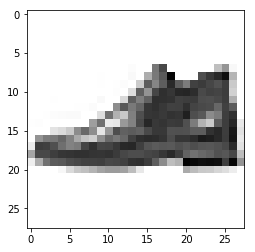

LABEL: 9
NN prediction:  7
Large NN prediction:  9


In [13]:
NN_prediction = mlp.predict(X_test) #ADD YOUR CODE
large_NN_prediction = mlp_large.predict(X_test) #ADD YOUR CODE

i = 0
found = False
while ((not found) and (i<len(y_test))):
    if (NN_prediction[i] != y_test[i]) and (large_NN_prediction[i] == y_test[i]):
        plot_input(X_test, y_test, i)
        print("NN prediction: ", NN_prediction[i])
        print("Large NN prediction: ",large_NN_prediction[i])
        found = True
    else:
        i += 1

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 50000 data points. Notice that the code assumes that the NNs are called "mlp" and "best_mlp_large" , you could need to replace with your variable names.



Weights with 500 data points:


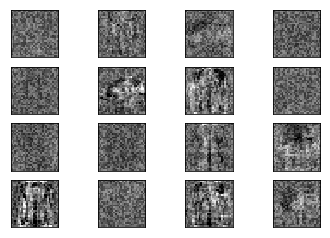

Weights with 10000 data points:


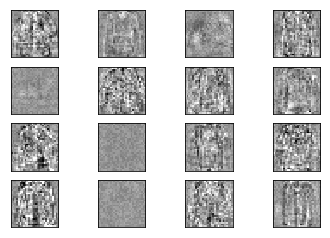

In [14]:
best_mlp_large = mlp_large

print("Weights with 500 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 10000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp_large.coefs_[0].min(), best_mlp_large.coefs_[0].max()
for coef, ax in zip(best_mlp_large.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 4

Describe what do you observe by looking at the weights

In smaller network the image are more clear than bigger network. Then, in the bigger network the weights are more averaged.

### TO DO 7

Report the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores.

In [15]:
start = timer()
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# best parameters found in the SVM notebook
# Create the SVM and perform the fit
best_SVM =  SVC(kernel='rbf', C=10, gamma=0.01)
best_SVM.fit(X_train,y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - best_SVM.score(X_train,y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test,y_test)
print("Test score SVM:")
print(SVM_test_error)

end = timer()
print(end - start)

RESULTS FOR SVM
Training score SVM:
0.008399999999999963
Test score SVM:
0.137
28.080606827000338


## QUESTION 5
Compare the results of SVM and of NN. Which one would you preferer? Which are its tradeoffs?

SVM is a bit better than NN, but SVM is slower than NN.